In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

In [3]:
df = pd.read_csv('./data/titanic_clean.csv')

In [5]:
label_sex = LabelEncoder()
label_embarked = LabelEncoder()

# Fit and transform on training data
df['Sex'] = label_sex.fit_transform(df['Sex'])
df['Embarked'] = label_embarked.fit_transform(df['Embarked'])

In [6]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
325,1,1,0,36.0,0,0,135.6333,0
638,0,3,0,41.0,0,5,39.6875,2
448,1,3,0,5.0,2,1,19.2583,0
224,1,1,1,38.0,1,0,90.0000,2
580,1,2,0,25.0,1,1,30.0000,2


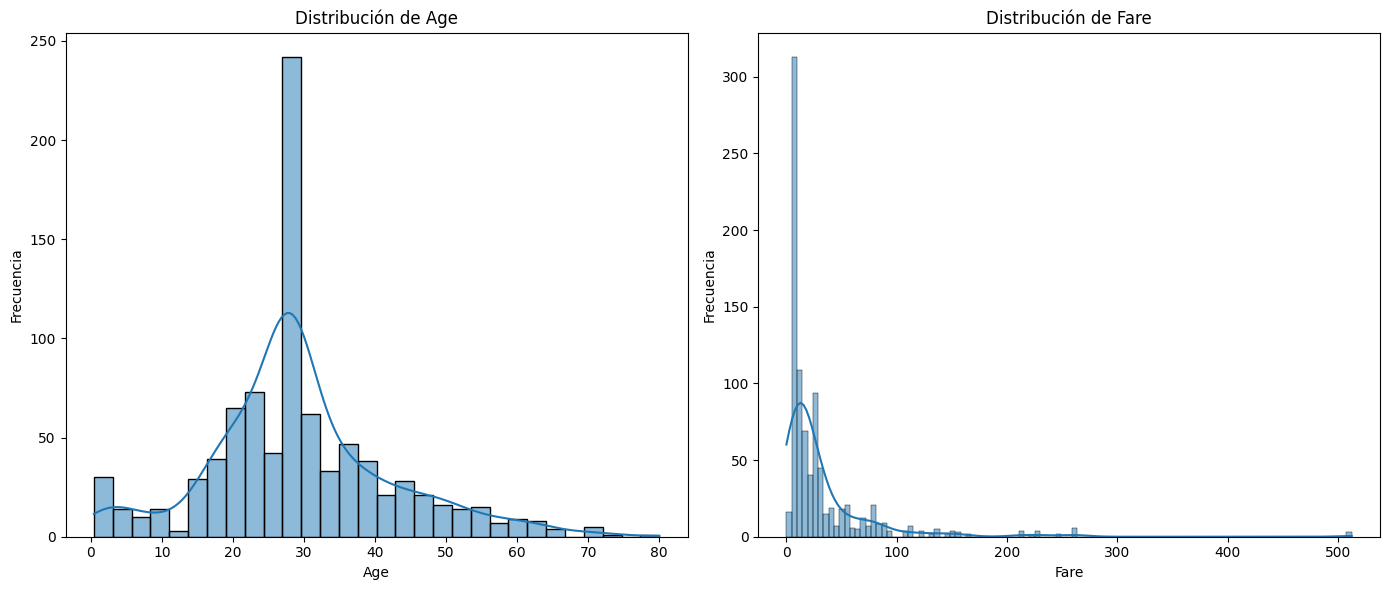

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['Age'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribución de Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frecuencia')

# Gráfica de la distribución de Fare
sns.histplot(df['Fare'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribución de Fare')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frecuencia')

# Mostrar las gráficas
plt.tight_layout()
plt.show()

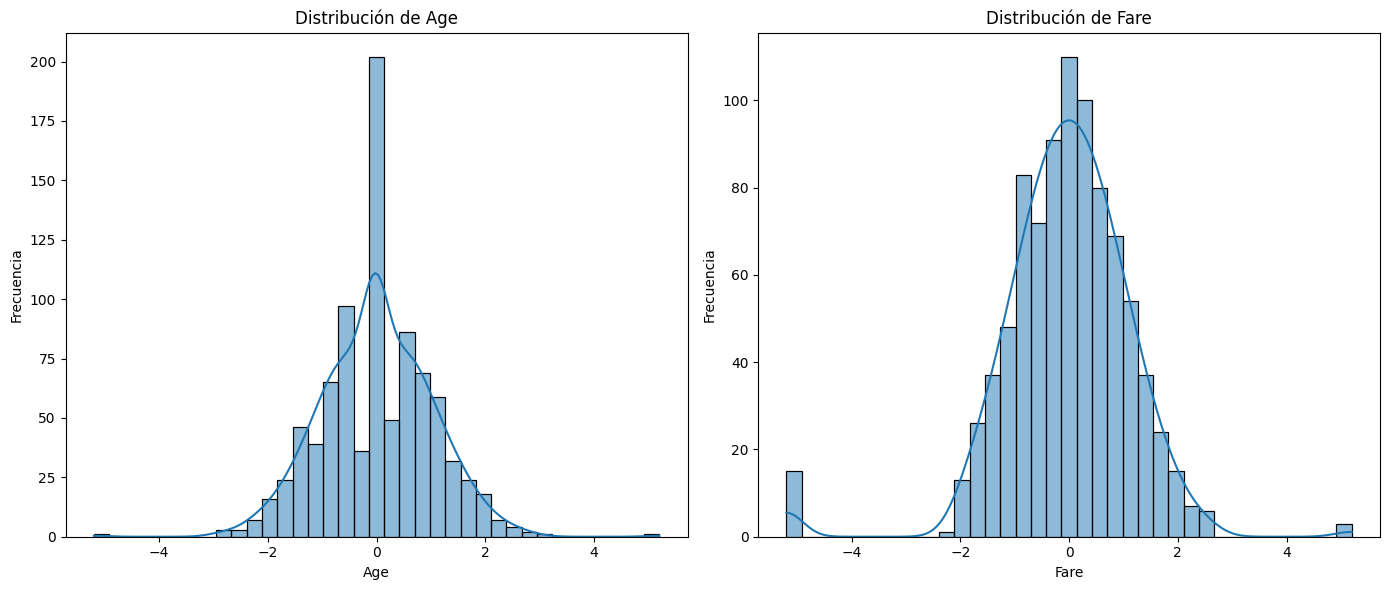

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['Age'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribución de Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frecuencia')

# Gráfica de la distribución de Fare
sns.histplot(df['Fare'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribución de Fare')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frecuencia')

# Mostrar las gráficas
plt.tight_layout()
plt.show()
qun_tra_age = QuantileTransformer(output_distribution = 'normal', n_quantiles=500)
qun_tra_fare = QuantileTransformer(output_distribution = 'normal', n_quantiles=500)

df['Age'] = qun_tra_age.fit_transform(df[['Age']])
df['Fare'] = qun_tra_fare.fit_transform(df[['Fare']])

In [12]:
mms_pclass= MinMaxScaler()
mms_sex = MinMaxScaler()
mms_age = MinMaxScaler()
mms_sibsp = MinMaxScaler()
mms_parch = MinMaxScaler()
mms_fare = MinMaxScaler()
mms_embarked = MinMaxScaler()

# Ejecutar transformaciones
df['Pclass'] = mms_pclass.fit_transform(df[['Pclass']])
df['Sex'] = mms_sex.fit_transform(df[['Sex']])
df['Age'] = mms_age.fit_transform(df[['Age']])
df['SibSp'] = mms_sibsp.fit_transform(df[['SibSp']])
df['Parch'] = mms_parch.fit_transform(df[['Parch']])
df['Fare'] = mms_fare.fit_transform(df[['Fare']])
df['Embarked'] = mms_embarked.fit_transform(df[['Embarked']])

In [13]:
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1.0,1.0,0.433152,0.125,0.0,0.368146,1.0
1,1,0.0,0.0,0.579431,0.125,0.0,0.615088,0.0
2,1,1.0,0.0,0.462346,0.000,0.0,0.438286,1.0
3,1,0.0,0.0,0.563806,0.125,0.0,0.595112,1.0
4,0,1.0,1.0,0.563806,0.000,0.0,0.448347,1.0


In [14]:
df.to_csv('./data/titanic_procesado.csv', index=False)